In [1]:
import numpy as np
import sympy as sp
import shared_functions as sf
from IPython.display import HTML
import matplotlib.pyplot as plt

Our focus in the last notebook, we used parabolas and cubic parameterisations and explored constructing oreintated edges and splines that could be in some sense, mapped to this these paramaterisations to provide approximations of area. We also saw that parabolic case, a theory of Archimedes

At this point we have a number of related formulas and I have created a shared_functions.py to hold them, and we will call them in as needed, and we will add to them. better practice and we will end up with too much boiler plate to get us started

At this point it is important to mention that parabolic functions, but circles are quiet different, and to an extent, more problematic. We won't be possible to find some kind of computation such as $ \frac 16 (1-\frac {1}{n^2}) $ where we can see that it approahces some particular number as n get's large. The circle does not lend itself to that. 

Let's start this issue, by just proceeding in a small way start exploring this using a parameterisation of a circle and providing a visualisation. Recall taht we have a parametrisatio of a circlewe will do an inscribed approximation to the circle, and then circumstrctived. Inscribed is standard area

$$A_t=e(t)=\left[\frac{1-t^2}{1+t^2},\frac{2t}{1+t^2}\right]$$

Let's start by putting that in, we will aslo put some points in. We will create a function for it: 

In [2]:
def compute_parameterised_point_from_circle(t):
    x1 = (1 - t^2) / ( 1 + t^2)
    x2 = (2 * t) / (1 + t^2)
    return([x1, x2])

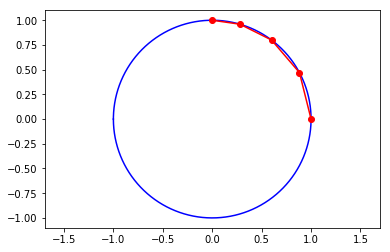

In [3]:
fig, ax = plt.subplots()
# points for circle
initial_values = np.arange(start=-1000, stop=1000, step=.001)
r = 1
x2 = (r * (1 - initial_values^2) / (1 + initial_values^2))
y2 = ((2 * r * initial_values) / (1 + initial_values^2))


points_choice = np.array([compute_parameterised_point_from_circle(0),
                         compute_parameterised_point_from_circle(1/4),
                         compute_parameterised_point_from_circle(1/2),
                         compute_parameterised_point_from_circle(3/4),
                        compute_parameterised_point_from_circle(1),])
#points_for_plotting = np.append(points_choice, [points_choice[0]], axis=0)
x1 = [e[0] for e in points_choice]
y1 = [e[1] for e in points_choice]


ax.axis('equal')

ax.plot(x2, y2, 'b')
ax.plot(x1, y1, 'r')
ax.plot(x1, y1, 'ro')

In [4]:
sf.compute_signed_area_using_meisters_formula([compute_parameterised_point_from_circle(0),
                         compute_parameterised_point_from_circle(1/4),
                         compute_parameterised_point_from_circle(1/2),
                         compute_parameterised_point_from_circle(3/4),
                         compute_parameterised_point_from_circle(1)], is_cyclic = False)

3243/4250

Note that is we coudl multiply this by 4 to get the signed area constructed by splines and get a approximation for $\pi$. Of course its not very accurate 

In [5]:
(3243 / 4250) * 4.

3.05223529411765

Its worth noting interesting above, that as poitns in icnrease, teh splines becomes shorter. let's drow alow more 

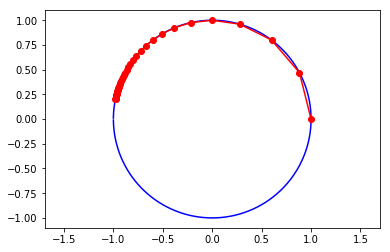

In [15]:
fig, ax = plt.subplots()
# points for circle



points_choice = np.array([compute_parameterised_point_from_circle(i) for i in np.arange(0,10, .25)])
#points_for_plotting = np.append(points_choice, [points_choice[0]], axis=0)
x1 = [e[0] for e in points_choice]
y1 = [e[1] for e in points_choice]


initial_values = np.arange(start=-200, stop=200, step=.01)
circle_coords = [compute_parameterised_point_from_circle(i) for i in initial_values]
x2 = [e[0] for e in circle_coords]
y2 = [e[1] for e in circle_coords]


ax.axis('equal')

ax.plot(x2, y2, 'b')
ax.plot(x1, y1, 'r')
ax.plot(x1, y1, 'ro')

Or we could go the other way too

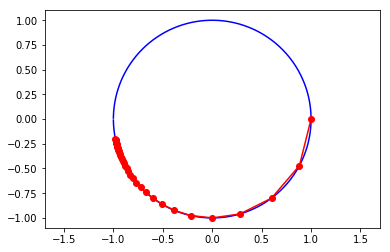

In [16]:
fig, ax = plt.subplots()
# points for circle



points_choice = np.array([compute_parameterised_point_from_circle(i) for i in np.arange(0,-10, -.25)])
#points_for_plotting = np.append(points_choice, [points_choice[0]], axis=0)
x1 = [e[0] for e in points_choice]
y1 = [e[1] for e in points_choice]


initial_values = np.arange(start=-200, stop=200, step=.01)
circle_coords = [compute_parameterised_point_from_circle(i) for i in initial_values]
x2 = [e[0] for e in circle_coords]
y2 = [e[1] for e in circle_coords]


ax.axis('equal')

ax.plot(x2, y2, 'b')
ax.plot(x1, y1, 'r')
ax.plot(x1, y1, 'ro')

Now let's look at the circumscribed version: here we are buidling slines that are tangent to th circle, and then creating a signed area. We will need to deal with lines for this his gives us a sense we are looking at a more complex structure. Again, note we are dealing with 

$$A_t=e(t)=\left[\frac{1-t^2}{1+t^2},\frac{2t}{1+t^2}\right]$$

but we need tangent line first....